c:\Users\ASUS\Lasitha\MSC Data Science\Principles of DS\Assignments\Portfolio-Q2\notebooks\../scripts\read_from_rds.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


                id        Price
count  1360.000000  1360.000000
mean    680.500000    34.958640
std     392.742494    14.467608
min       1.000000    10.000000
25%     340.750000    21.990000
50%     680.500000    36.025000
75%    1020.250000    47.342500
max    1360.000000    59.990000


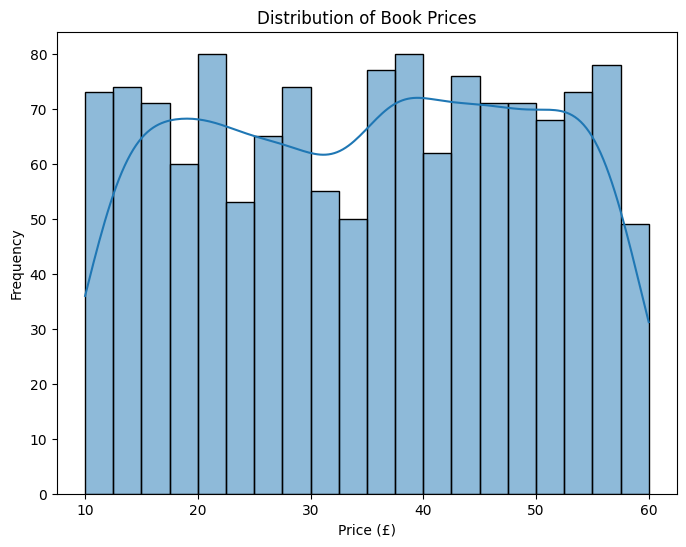

In [1]:
# notebooks/eda.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../scripts")
from read_from_rds import read_data

# Read data from RDS MySQL
df = read_data()

# Basic statistics
print(df.describe())

# Distribution of prices
plt.figure(figsize=(8, 6))
sns.histplot(df["Price"], bins=20, kde=True)
plt.title("Distribution of Book Prices")
plt.xlabel("Price (£)")
plt.ylabel("Frequency")
plt.show()